# **Avoiding Optimization Traps**

In [17]:
Goal="""In this code I explore how optimization algorithms like gradient descent can get stuck in flat regions of the loss landscapes.
I will design and test a technique that helps the optimizer escape these traps and continue improving the model."""


## Data Preprocessing

In [18]:
"""data source: https://drive.google.com/file/d/19-O6HKpcEnSq_O6bAsPoffrz0S7Hg6V3/view
to run this code, download the file and change the file = pd.read_csv() bellow to your file address"""
import pandas as pd

file = pd.read_csv(r"C:\Users\Maryam\Desktop\8th term\ML\E4.ML\flat_loss.csv")
from sklearn.model_selection import train_test_split
x=file.iloc[:,1].values.reshape(-1, 1) 
y=file.iloc[:,2].values

#splitting the train & test
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=np.array(x_train) #making it to the np.array format helps us work with it
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#we need scaling to limit the ws
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Loss Function- Mean Squared Error (MSE)

In [19]:
import numpy as np
def loss(x,y,w,b):
    return np.mean((y-(x*w+b))**2)

def gradloss(x,y,w,b):
    dw=np.mean(-2*(y-(x*w))*x)
    db= np.mean(-2*(y-(x*w+b)))
    return np.array([dw,db])

## Optimizer - Gradient Descent

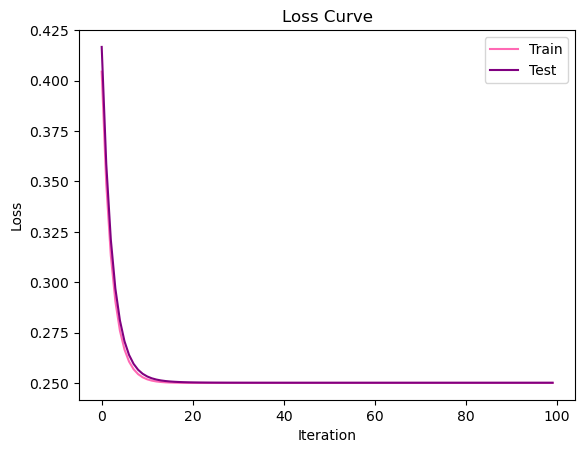

In [20]:
import matplotlib.pyplot as plt
def GD(x,y,η,iteration,x1,y1,a):
    LOSS_train=[]
    LOSS_test=[]
    w=np.random.rand(1)*0.01 #the matrice of w will be updated later
    b=np.random.rand(1)*0.01 #this is the intercept of the model
    for j in range(iteration):
        if gradloss(x,y,w,b)[0] ==0:
            w+=a #a is a constant that helps us avoid the landscape 
        else:
            w-=η*gradloss(x,y,w,b)[0]
            b-=η*gradloss(x,y,w,b)[1]

            LOSS_train.append(loss(x,y,w,b))
            LOSS_test.append(loss(x1,y1,w,b))
    return w,LOSS_train,LOSS_test

loss_gd=GD(x_train,y_train,0.1,100,x_test,y_test,a=0.5)
itr=[]
for i in range(100):
    itr.append(i)
plt.plot(itr,loss_gd[1],label="Train",color='hotpink') #LOSS_train
plt.plot(itr,loss_gd[2],label="Test",color="purple") #LOSS_test
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()